## Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

## Import Dataset

In [2]:
# import data
! gdown --id 1j1T1Cfq6kbEsQpsDWmJKh1_lsZU2ODPY

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j1T1Cfq6kbEsQpsDWmJKh1_lsZU2ODPY
To: /content/16P - Indonesia.csv
100% 8.98M/8.98M [00:00<00:00, 56.7MB/s]


In [3]:
mbti = pd.read_csv('16P - Indonesia.csv')
mbti['Kepribadian'] = mbti['Kepribadian'].replace({'ESTJ': 0, 'ENTJ': 1, 'ESFJ' :2, 'ENFJ':3, 'ISTJ':4, 'ISFJ' : 5, 'INTJ': 6, 'INFJ': 7, 'ESTP' :8, 'ESFP':9, 'ENTP':10,'ENFP' : 11,'ISTP':12, 'ISFP':13, 'INTP':14, 'INFP':15 })
mbti.head()

,Response Id,Anda secara teratur mendapatkan teman baru.,Anda menghabiskan banyak waktu luang untuk menjelajahi berbagai topik acak yang menarik minat Anda,Melihat orang lain menangis dapat dengan mudah membuat Anda merasa ingin menangis juga,Anda sering membuat rencana cadangan untuk rencana cadangan.,"Anda biasanya tetap tenang, bahkan di bawah banyak tekanan","Di acara sosial, Anda jarang mencoba memperkenalkan diri kepada orang baru dan kebanyakan berbicara dengan orang yang sudah Anda kenal",Anda lebih memilih untuk menyelesaikannya sepenuhnya proyek sebelum memulai yang lain.,Anda sangat sentimental.,Anda suka menggunakan alat pengorganisasian seperti jadwal dan daftar.,...,Anda percaya bahwa merenungkan pertanyaan filosofis abstrak adalah buang-buang waktu.,Anda merasa lebih tertarik ke tempat-tempat dengan suasana sibuk dan ramai daripada tempat yang tenang dan intim.,Anda tahu sekilas bagaimana perasaan seseorang.,Anda sering merasa kewalahan.,Anda menyelesaikan berbagai hal secara metodis tanpa melewatkan langkah apa pun.,Anda sangat tertarik dengan hal-hal yang dianggap kontroversial.,Anda akan memberikan kesempatan bagus jika Anda pikir orang lain lebih membutuhkannya.,Anda berjuang dengan tenggat waktu.,Anda merasa yakin bahwa segala sesuatunya akan berhasil untuk Anda.,Kepribadian
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,11
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,13
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,7
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,12
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,3


In [4]:
# Melihat informasi tentang data
print(mbti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                                  --------------  -----
 0   Response Id                                                                                                                             59999 non-null  int64
 1   Anda secara teratur mendapatkan teman baru.                                                                                             59999 non-null  int64
 2   Anda menghabiskan banyak waktu luang untuk menjelajahi berbagai topik acak yang menarik minat Anda                                      59999 non-null  int64
 3   Melihat orang lain menangis dapat dengan mudah membuat Anda merasa ingi

In [5]:
# Memeriksa apakah ada data kosong
print("Jumlah data kosong: ", mbti.isnull().sum().sum())

Jumlah data kosong:  0


In [6]:
# Memeriksa apakah ada data duplikat
print("Jumlah data duplikat:", mbti.duplicated().sum())

Jumlah data duplikat: 0


In [7]:
mbti["Kepribadian"].value_counts()

9     3769
7     3761
11    3760
10    3760
0     3759
4     3756
12    3755
8     3749
13    3746
2     3746
3     3743
6     3743
14    3742
5     3739
1     3737
15    3734
Name: Kepribadian, dtype: int64

In [8]:
# Memisahkan fitur dan label
X = mbti.iloc[:, 1:-1]  # Kolom fitur dimulai dari indeks 1 hingga sebelum kolom terakhir
y = mbti.iloc[:, -1]   # Kolom label adalah kolom terakhir

Text(0.5, 1.0, 'The number of digit classes')

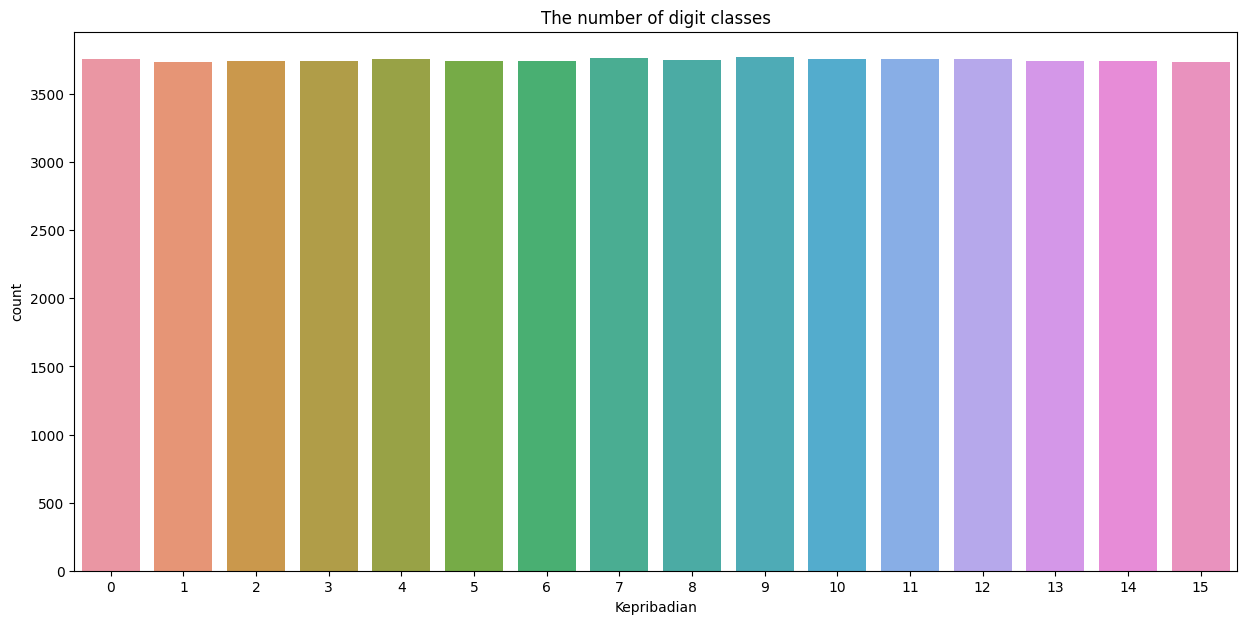

In [9]:
plt.figure(figsize=(15, 7))
sns.countplot(x=y)
plt.title("The number of digit classes")

In [10]:
# Konversi label menjadi numerik menggunakan one-hot encoding
y_encoded = pd.get_dummies(y)

In [11]:
# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47999, 60)
(12000, 60)
(47999, 16)
(12000, 16)


In [12]:
# Membangun model
model = tf.keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu',),
    keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

# Menentukan fungsi loss dan optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3904      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 9,104
Trainable params: 9,104
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Melatih model
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=16,
                    validation_data=(X_test, y_test))


Epoch 1/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.5227 - accuracy: 0.8586 - val_loss: 0.1898 - val_accuracy: 0.9656
Epoch 2/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2639 - accuracy: 0.9410 - val_loss: 0.1699 - val_accuracy: 0.9728
Epoch 3/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2276 - accuracy: 0.9522 - val_loss: 0.1582 - val_accuracy: 0.9757
Epoch 4/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2120 - accuracy: 0.9573 - val_loss: 0.1582 - val_accuracy: 0.9766
Epoch 5/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2040 - accuracy: 0.9597 - val_loss: 0.1496 - val_accuracy: 0.9794
Epoch 6/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1917 - accuracy: 0.9622 - val_loss: 0.1520 - val_accuracy: 0.9786
Epoch 7/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1817 - accuracy: 0.9649 - val_loss: 0.1497 - val_accurac

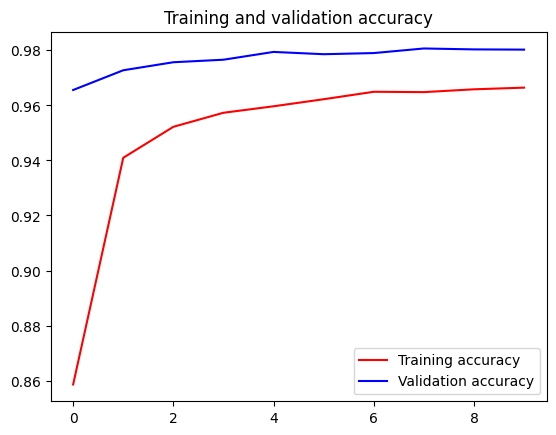

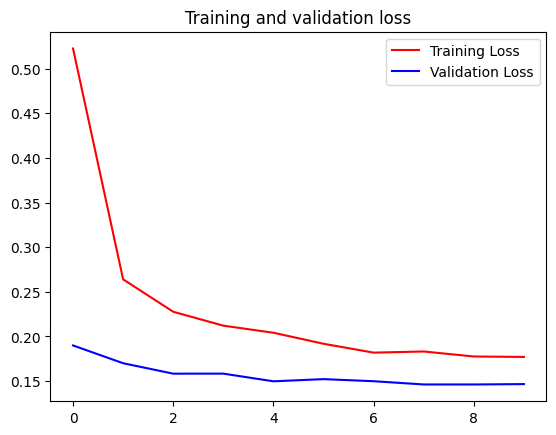

In [14]:
# Plot grafik untuk akurasi dan loss pada training dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

375/375 [==============================] - 1s 3ms/step - loss: 0.1465 - accuracy: 0.9803
Test loss: 0.1464766263961792
Test accuracy: 0.9802500009536743


In [16]:
# Menyimpan model dalam format SavedModel
model.save('model.h5')

In [17]:
load_path = '/content/model.h5'

# Load model
model = tf.keras.models.load_model(load_path)

In [18]:
# Mengkonversi model menjadi format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [19]:
# Menyimpan model TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)